# Randomness (and chaos?):

Simpler:
- Explore some random number generators in python
- Numerically demonstrate relation between binomial and normal distributions

Meso:
- What is randomness? -> What metrics are there for detecting non/randomness? moments, NIST
- Look at existing RNGs - do they measure up?
- Construct your own RNG - how does it perform?
- Input a string by hand - how random can you make it? (Can we differentiate individuals within the class?)
- How do you construct uniform samplers on more interesting spaces?
- Create a uniform sampler within a disk. 
- Create a uniform sampler on sphere. 1) map uniform square 2) use exponent method
- Create fair coin from biased (vN trick method).
- Morse Thue

Deep:
- What is randomness? Is anything truly random?
- Why is randomness important in (scientific) computing?

Resources:
- http://scalettar.physics.ucdavis.edu/darpa/randommoments.pdf
- Basic lecture. Moments are w.r.t. mean. https://www.statlect.com/fundamentals-of-probability/moments
- https://en.wikipedia.org/wiki/Moment_(mathematics)
- Popish article. some good launch points. poorly written. https://medium.com/unitychain/provable-randomness-how-to-test-rngs-55ac6726c5a3
- Summaries of tests. https://csrc.nist.gov/projects/random-bit-generation/documentation-and-software/guide-to-the-statistical-tests
- Article on test suite. https://nvlpubs.nist.gov/nistpubs/legacy/sp/nistspecialpublication800-22r1a.pdf
- Test suite. https://csrc.nist.gov/publications/detail/sp/800-22/rev-1a/final
- NIST test suite https://nvlpubs.nist.gov/nistpubs/legacy/sp/nistspecialpublication800-22r1a.pdf
- https://csrc.nist.gov/projects/random-bit-generation/documentation-and-software/guide-to-the-statistical-tests
- https://csrc.nist.gov/publications/detail/sp/800-22/rev-1a/final


In [56]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext pycodestyle_magic
%pycodestyle_on

%matplotlib inline

In [2]:
# TRY: Look through the np.random module and test a few sampling functions.
for i in range(5):
    # x = np.random.standard_normal(size=(3,))
    # x = np.random.randint(low=2, high=8, size=(2,4))
    x = np.random.uniform(1.0, 3.0, size=(4,))
    print(x)

[1.37034138 1.05851095 1.36202534 1.32413291]
[2.97125899 2.87919139 2.12231156 1.37023565]
[2.23647109 2.03984739 1.34179594 2.85056758]
[1.52140691 1.29871975 1.28590072 1.97956192]
[1.89736193 2.71816684 2.45724152 2.34117222]


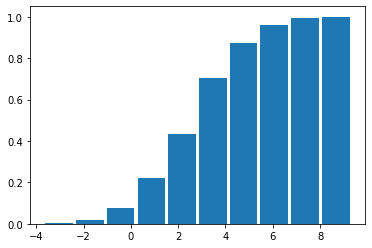

11:80: E501 line too long (88 > 79 characters)


In [3]:
# TRY: Make a histogram using np.random.normal

num = 10**3
loc = 3.0
scale = 2.0
samples = np.random.normal(loc=loc, scale=scale, size=num)

fig = plt.figure()
ax = plt.gca()

n, bins, patches = plt.hist(samples, bins=10, rwidth=0.9, density=True, cumulative=True)

In [4]:
# Explore these return values
# n
# bins
# patches

In [5]:
# Flip a coin many times. Return the sequence of 'H' and 'T'.
# Allow for "unfairness"
def sample_coin(prob_heads=0.5, num=10):
    # Return a list of coin flips, 'H' and 'T'.
    uniforms = np.random.random(size=num)
    coins = ['H' if u < prob_heads else 'T' for u in uniforms]
    return coins


def num_heads(prob_heads=0.5, num=10):
    uniforms = np.random.random(size=num)
    num_heads = np.sum(uniforms < prob_heads)
    return num_heads

In [6]:
# sample_coin()
num_heads()

5

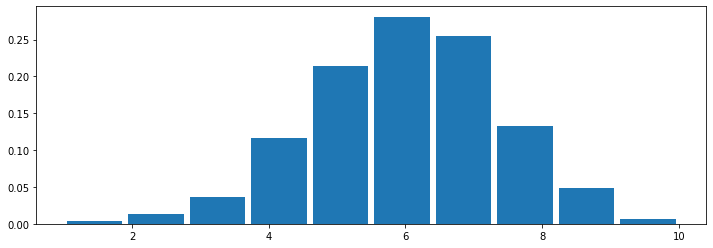

1:80: E501 line too long (92 > 79 characters)
4:80: E501 line too long (100 > 79 characters)


In [7]:
# Over many samples, the number of "heads" is typically near num*prob_heads, but fluctuates.
# TRY: Plot a histogram of this behavior.

# NOTE: If you run this a dozen times, you will find cases where one of the largest bars disappears.
# What's going on here?

num_samples = 10**3
flips_per_sample = 10
prob_heads = 0.6

num_Hs = []

for ind in range(num_samples):
    x = num_heads(prob_heads=prob_heads, num=flips_per_sample)
    num_Hs.append(x)

fig = plt.figure(figsize=(12, 4))
ax = plt.gca()

n, bins, patches = plt.hist(num_Hs, bins=10, rwidth=0.9, density=True)

# bin_edges = [x - 0.5 for x in range(flips_per_sample + 2)]
# n, bins, patches = plt.hist(num_Hs, bins=bin_edges, rwidth=0.9, density=True)

# ax.set_xticks(range(flips_per_sample + 1));

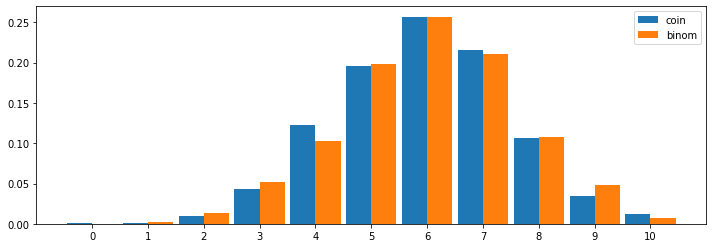

19:80: E501 line too long (122 > 79 characters)
22:80: E501 line too long (114 > 79 characters)


In [8]:
# This is a roundabout way of drawing from a binomial distribution.
# Compare

num_samples = 10**3
flips_per_sample = 10
prob_heads = 0.6

num_Hs = []

for ind in range(num_samples):
    x = num_heads(prob_heads=prob_heads, num=flips_per_sample)
    num_Hs.append(x)

binom_Hs = np.random.binomial(flips_per_sample, prob_heads, num_samples)

fig = plt.figure(figsize=(12, 4))
ax = plt.gca()

# plt.hist([num_Hs, binomial_Hs], bins=10, rwidth=0.9, density=True, color=['r', 'b'], alpha=0.5, label=['coin', 'binom'])

bin_edges = [x - 0.5 for x in range(flips_per_sample + 2)]
n, bins, patches = plt.hist([num_Hs, binom_Hs], bins=bin_edges, rwidth=0.9, density=True, label=['coin', 'binom'])

ax.set_xticks(range(flips_per_sample + 1))

plt.legend()

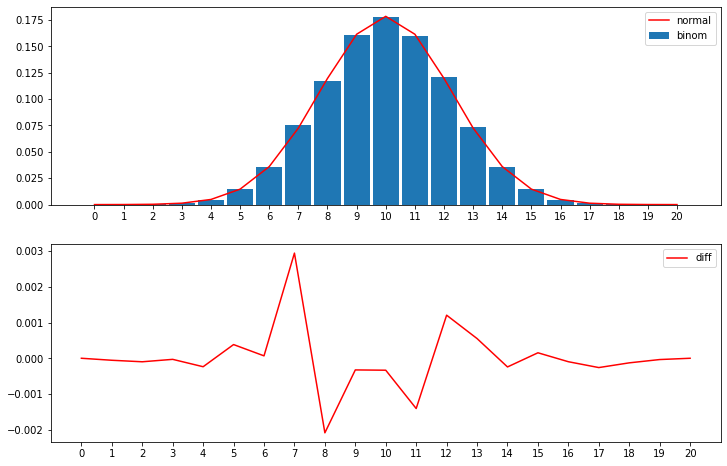

1:80: E501 line too long (109 > 79 characters)
27:80: E501 line too long (87 > 79 characters)


In [9]:
# Further, as the number of flips per event becomes large, the distribution approaches a normal distribution.
# Compare / fit the normal.

import scipy.stats as stats

num_samples = 10**5
flips_per_sample = 20
prob_heads = 0.5

event_space = range(flips_per_sample + 1)

# TRY: Find values for `mean' and `std' that complete the fit.
mean = prob_heads * flips_per_sample
std = flips_per_sample**0.5 / 2
normal_Hs = stats.norm.pdf(event_space, loc=mean, scale=std)
# This is an object oriented way to work with random variables - nicer overall.
# normal_rv = stats.norm(loc=mean, scale=std)
# normal_Hs = normal_rv.pdf(event_space)

binom_Hs = np.random.binomial(flips_per_sample, prob_heads, num_samples)
# binom_rv = stats.binom(n=flips_per_sample, p=prob_heads)
# binom_Hs = binom_rv.pmf(k=event_space)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

bin_edges = [x - 0.5 for x in range(flips_per_sample + 2)]
n, _, _ = ax[0].hist(binom_Hs, bins=bin_edges, rwidth=0.9, density=True, label='binom')

# ax[0].plot(event_space, binom_Hs, 'b', label='binom')
ax[0].plot(event_space, normal_Hs, 'r', label='normal')

ax[1].plot(event_space, n - normal_Hs, 'r', label='diff')
# ax[1].plot(event_space, binom_Hs - normal_Hs, 'r', label='diff')

# ax[1].vlines(binom_rv.mean(), 0, 0.001, 'b')
# ax[1].vlines(normal_rv.mean(),0, 0.001, 'r')

# This makes things a little slow with lots of tick labels.
ax[0].set_xticks(event_space)
ax[1].set_xticks(event_space)

ax[0].legend()
ax[1].legend()

In [10]:
# In the above comparison of binomial to normal:
# It is interesting to see how the difference depends on the number of samples. 
# Is it becoming flatter?
# Is it becoming smoother?
# What is the limiting behavior?
# How many samples do you need to see a really nice looking relationship?
# Now switch to the analytic form for the binomial distribution and compare the two mathematical functions directly.
# How do they compare? means? max diff?
# What happens when the probability of Heads is not 0.5?

2:80: W291 trailing whitespace
7:80: E501 line too long (116 > 79 characters)


# Let's write our own random sampler / random number generator (RNG).

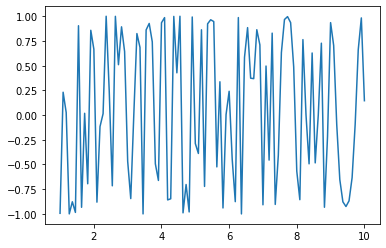

In [11]:
# This function looks pretty random - can we turn it into a good RNG?
xs = np.linspace(1, 10, 100)
ys = np.sin(12345 / xs)

plt.plot(xs, ys)

In [12]:
def my_rng(low=0, high=1, num=10, seed=12345):
    # Return a list of `num' integers between `low' and `high' inclusive with a uniform distribution.
    # The output should depend on the `seed'.
    # Don't use any packages and try to do this without any references.

    rns = []
    for i in range(num):
        x = np.sin(seed / (i + 1))
        x *= (high - low) / 2
        x += high / 2
        x = np.around(x)
        rns.append(x)

    return rns

2:80: E501 line too long (101 > 79 characters)


(array([31., 23., 20., 26.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5]),
 <a list of 4 Patch objects>)

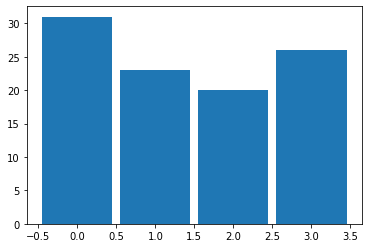

In [13]:
low = 0
high = 3
num = 100

rns = my_rng(low=low, high=high, num=num)

plt.hist(rns, bins=np.arange(low, high + 2) - 0.5, rwidth=0.9)

# plt.scatter(range(len(rns)), rns)

In [14]:
# Does this look like a good RNG to you?
# TRY: Can you fix it up to make it better?

# Metrics for detecting randomness

In [15]:
# Moments
def moment_1(data):
    # This is the expectation value
    values, counts = np.unique(data, return_counts=True)
    return np.dot(values, counts) / len(data)


def moment_n(data, n, centered=True):
    if centered:
        mean = moment_1(data)
    else:
        mean = 0
    values, counts = np.unique(data, return_counts=True)
    return np.dot((values - mean)**n, counts) / len(data)

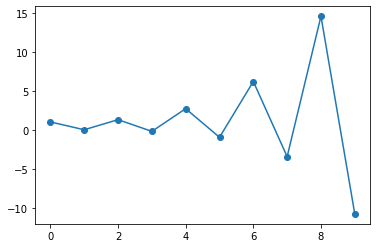

12:1: E115 expected an indented block (comment)
13:1: E115 expected an indented block (comment)
14:1: E115 expected an indented block (comment)
16:1: W293 blank line contains whitespace


In [16]:
low = 0
high = 3
num = 1000

rns = my_rng(low=low, high=high, num=num)

# print(moment_1(data=rns))

moments = []

for n in range(0, 10):
#     print(n)
#     print(moment_n(data=rns, n=n, centered=True))
#     print(moment_n(data=rns, n=n, centered=False))
    moments.append(moment_n(data=rns, n=n, centered=True))
    
plt.plot(moments, 'o-')

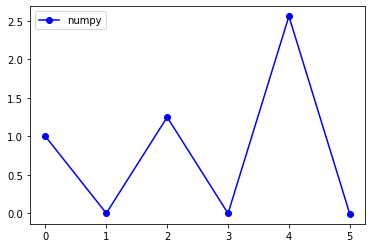

6:1: E265 block comment should start with '# '
13:1: E115 expected an indented block (comment)
15:1: W293 blank line contains whitespace
16:1: E265 block comment should start with '# '


In [17]:
# How does this compare with a purportedly good RNG?
low = 0
high = 4
num = 10**6

#my_rns = my_rng(low=low, high=high, num=num)
rns = np.random.randint(low=low, high=high, size=num)

my_moments = []
moments = []

for n in range(0, 6):
#    my_moments.append(moment_n(data=my_rns, n=n, centered=True))
    moments.append(moment_n(data=rns, n=n, centered=True))
    
#plt.plot(my_moments, 'ro-', label='mine')
plt.plot(moments, 'bo-', label='numpy')
plt.legend()

In [18]:
# At a minimum, we'd like the histogram of discrete outputs to be pretty flat.
# But is that enough? 
# TRY: Devise a RNG that has a very very flat histogram that is arguably not very random.


2:22: W291 trailing whitespace
3:80: E501 line too long (89 > 79 characters)
4:1: W391 blank line at end of file


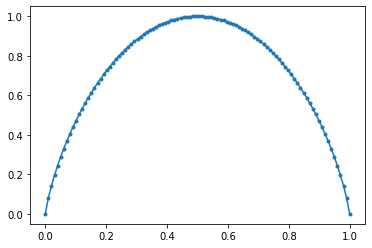

8:1: W293 blank line contains whitespace


In [19]:
# One good measure of flatness is entropy.
# If a distribution has two outcomes in the event space, what is the maximum entropy?

ps = np.linspace(0, 1, 100)
Hs = []
for p in ps:
    probs = [p, 1-p]
    H = stats.entropy(probs, base=2)
    Hs.append(H)

plt.plot(ps, Hs, '.-')

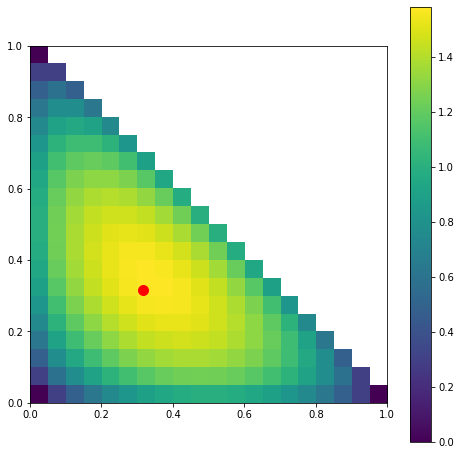

1:80: E501 line too long (88 > 79 characters)
24:80: E501 line too long (90 > 79 characters)


In [55]:
# TRY: Construct a 2D plot (heatmap) of the entropy of a distribution over three events.
# For example: probs = [0.3, 0.2, 0.5]
# Compute the maximum value and mark it on the graph.

N = 20
ps = np.linspace(0, 1, N)
qs = np.linspace(0, 1, N)

Hs = np.zeros((N, N))

for pind, p in enumerate(ps):
    for qind, q in enumerate(qs):
        probs = [p, q, 1 - p - q]
        H = stats.entropy(probs, base=2)
        Hs[pind, qind] = H

max_inds = np.argmax(Hs)
max_inds = np.unravel_index(max_inds, shape=Hs.shape)

fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
im = plt.imshow(Hs, extent=[0, 1, 0, 1], origin='lower')
plt.scatter(ps[max_inds[0]], qs[max_inds[1]], 100, 'r')
plt.colorbar(im)  # NOTE: Try just colorbar(). What happens?